<a href="https://colab.research.google.com/github/Vargol/StableDiffusionColabs/blob/main/SDXL/lcm_lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.5 MB/s eta 0:00:00


In [ ]:
from diffusers import DiffusionPipeline, LCMScheduler
import torch
import mediapy

model_id = "stabilityai/stable-diffusion-xl-base-1.0"
lcm_lora_id = "latent-consistency/lcm-lora-sdxl"

pipe = DiffusionPipeline.from_pretrained(model_id, variant="fp16", torch_dtype=torch.float16)

pipe.load_lora_weights(lcm_lora_id, torch_dtype=torch.float16)
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)
pipe.to(device="cuda", dtype=torch.float16)



  0%|          | 0/4 [00:00<?, ?it/s]

""

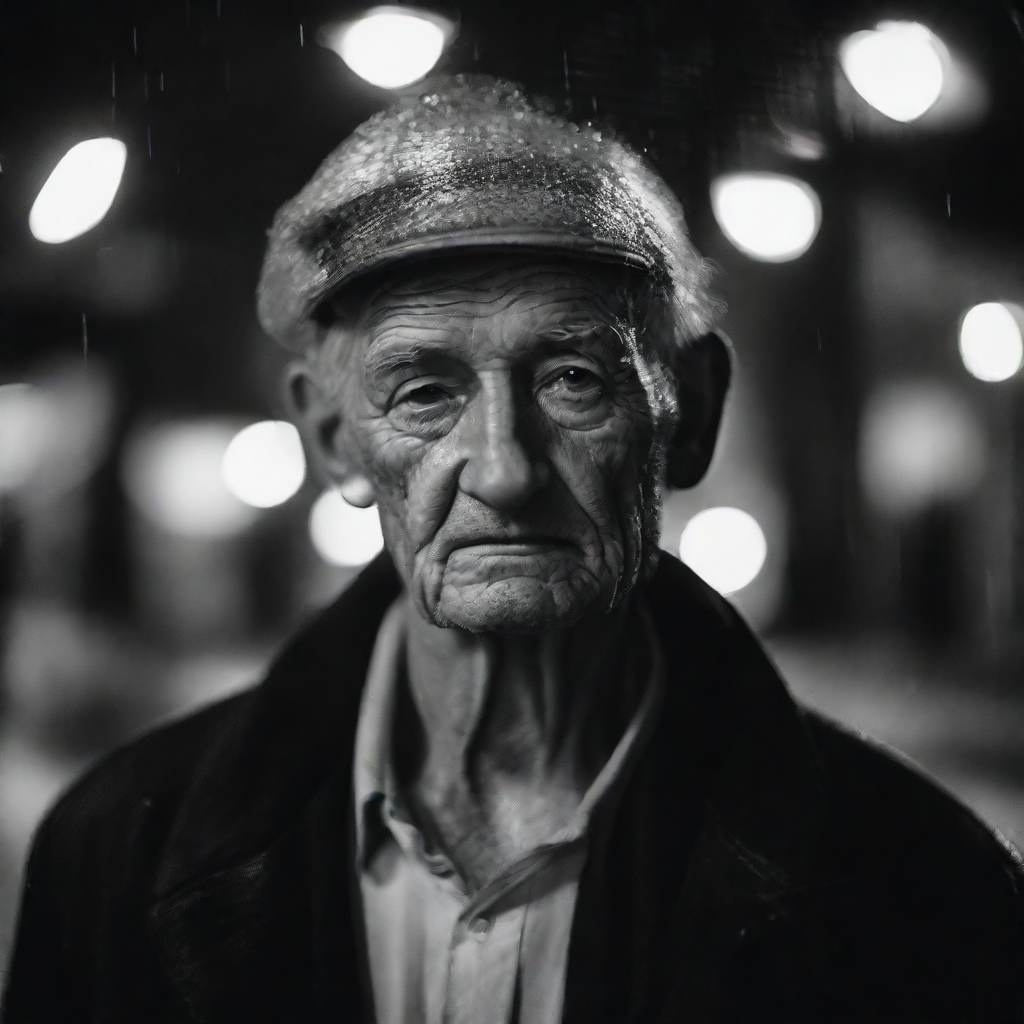

In [2]:
prompt = "close-up photography of old man standing in the rain at night, in a street lit by lamps, leica 35mm summilux"
images = pipe(
    prompt=prompt,
    num_inference_steps=4,
    guidance_scale=1,
).images[0]

mediapy.show_image(images)